In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sms
import os
import inspect

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 '7U7D.csv',
 'AADIS.csv',
 'Aggregation-checkpoint.ipynb',
 'AllSharedRewardData.csv',
 'AUDIT, DUDIT, AADIS, 7U7D, rescoring and aggregation.ipynb',
 'FullSharedRewardData.csv',
 'Helping Ori & Amanda.ipynb',
 'ISTART - RECOVERED DATA - reward sensitivity screeners.csv',
 'ISTART-Reward-Quintiles-Combined.csv',
 'ISTART2021-Demographics_DATA_2021-10-29_1323.csv',
 'ISTART2021-QuestionnaireScoresU_DATA_2021-10-29_1336.csv',
 'ISTART2021-RewardSensitivityQui_DATA_2021-10-29_1337.csv',
 'ISTART2021-RSQ.csv',
 'joinedfile.csv',
 'Making_RS_PCA.ipynb',
 'QualtricsData_011022.xlsx',
 'ReadMe_Behavioral_Analysis.txt',
 'Reward_Sensitivity.csv',
 'Shared Reward Behavioral Analysis.ipynb',
 'Shared Reward Data Aggregation.ipynb',
 'SR_PartnerRatings.csv',
 'SR_PartnerRatings_PS.csv',
 'SR_REDCap_data.csv',
 'Substance_and_Mood_data.csv',
 'Substance_and_Mood_data_SCORED.csv',
 'ugdg_tsr_means.xlsx',
 'Untitled.ipynb']

In [3]:
fname='Reward_Sensitivity.csv'
df=pd.read_csv(fname)
print(type(df))
print(type(pd.read_csv))



<class 'pandas.core.frame.DataFrame'>
<class 'function'>


,Unnamed: 0,RealID,gender,SPSRWD,BISBAS_BAS,PC1
Unnamed: 0,1.000000,0.895969,-0.011629,-0.045554,0.010903,-0.013265
RealID,0.895969,1.000000,0.034682,-0.019949,0.055356,0.032037
gender,-0.011629,0.034682,1.000000,0.199880,-0.023857,0.072105
SPSRWD,-0.045554,-0.019949,0.199880,1.000000,0.622707,0.857711
BISBAS_BAS,0.010903,0.055356,-0.023857,0.622707,1.000000,0.936422
PC1,-0.013265,0.032037,0.072105,0.857711,0.936422,1.000000


<AxesSubplot:>

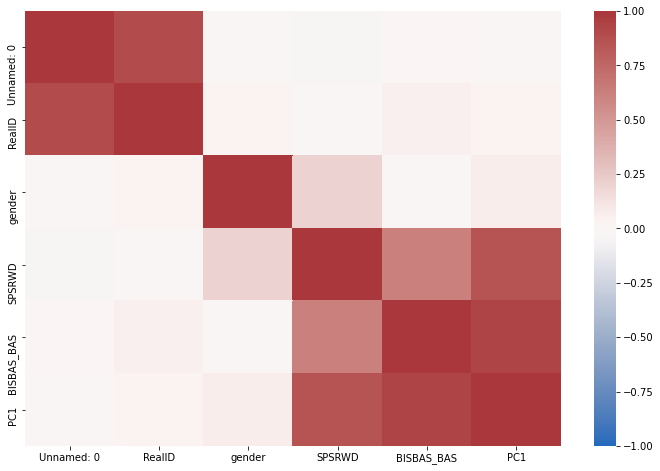

In [4]:
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)


Correlation between reward sensitivity is 
 R^2: 0.38776420899824054 p: 4.389185864714769e-11


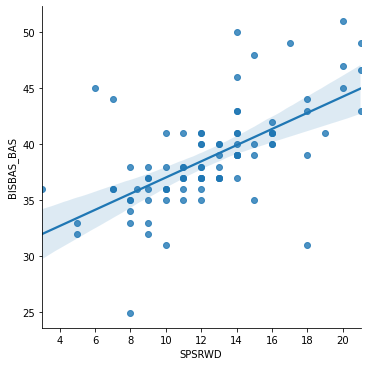

<class 'seaborn.axisgrid.FacetGrid'>


In [5]:
df=df[['RealID','gender','SPSRWD','BISBAS_BAS']]
r,p=stats.pearsonr(df['SPSRWD'],df['BISBAS_BAS'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='SPSRWD',y='BISBAS_BAS',data=df)
plt.show()
print(type(g))


In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

features=['SPSRWD','BISBAS_BAS']
X = df.loc[:, features].values
PC1=pca.fit_transform(X)
print(PC1)

df['PC1']=PC1
display(df['PC1'])
df.to_csv(fname,index='False')

[[  0.68841083]
 [ -1.41780736]
 [  0.85358149]
 [  1.10192185]
 [  1.10192185]
 [  0.19289882]
 [ -1.70714821]
 [ -1.70714821]
 [ -0.46778384]
 [ -2.69817221]
 [  0.64741034]
 [ -2.32683039]
 [  1.10192185]
 [ -9.18433487]
 [  3.91099191]
 [ -1.54197754]
 [ -5.13590045]
 [  2.50645688]
 [ -3.73136542]
 [  9.52913203]
 [  1.72160403]
 [  6.72006197]
 [ -2.32683039]
 [ 11.39149789]
 [ -0.30261318]
 [ 10.80949688]
 [ -4.51621827]
 [  1.8867747 ]
 [ -3.89653609]
 [  8.78527967]
 [ -4.3510476 ]
 [  2.67162755]
 [  1.10192185]
 [  1.26709252]
 [ -2.16165972]
 [-13.66951552]
 [  3.12613906]
 [ -1.54197754]
 [  3.58065058]
 [ -8.06914069]
 [ -5.75558263]
 [  1.26709252]
 [ -3.73136542]
 [ -7.65562966]
 [  3.91099191]
 [ -0.92229536]
 [ -3.56619475]
 [  3.91099191]
 [ -6.70560615]
 [ -3.40102408]
 [ 11.09883773]
 [ -1.08746603]
 [ -0.92229536]
 [  1.43226319]
 [  3.12613906]
 [  7.50491482]
 [ -1.08746603]
 [  8.57910852]
 [ -3.2768539 ]
 [ -3.11168324]
 [ -2.32683039]
 [ -1.08746603]
 [  1.43

0     0.688411
1    -1.417807
2     0.853581
3     1.101922
4     1.101922
        ...   
86    2.671628
87   -5.590412
88   -1.087466
89    0.482240
90   -1.707148
Name: PC1, Length: 91, dtype: float64

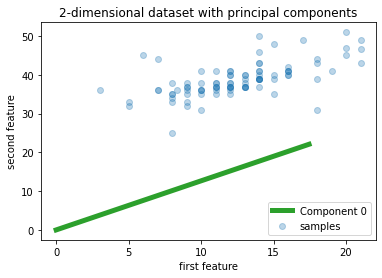

In [7]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()